In [ ]:
%matplotlib inline


# Graphs from Polygons

This example shows how to build a graph from a set of polygons
using PySAL and geopandas. We'll focus on the Queen contiguity 
graph, but constructors are also provided for Rook contiguity, 
as well as other kinds of graphs from the polygon centroids. 


In [1]:
from libpysal import weights
import matplotlib.pyplot as plt
import networkx as nx
import geopandas
import numpy as np
import requests
import os

In [5]:
# read in example data from geojson. GeoJSON is a file format
# for encoding geographic data based on JSON. It is useful for
# presenting geographic data on the web, and is increasingly
# used as a file format for geographic data.
filepath = 'NUTS_RG_20M_2021_3035.geojson'
european_regions = geopandas.read_file(filepath)

In [11]:
european_regions.centroid.x

0       2.910634e+06
1       4.825320e+06
2       5.031974e+06
3       5.167090e+06
4       4.631385e+06
            ...     
2005    6.852677e+06
2006    6.923014e+06
2007    4.502025e+06
2008    4.497000e+06
2009    3.652696e+06
Length: 2010, dtype: float64

In [12]:
# extract the centroids for connecting the regions, which is
# the average of the coordinates that define the polygon's boundary
centroids = np.column_stack((european_regions.centroid.x, european_regions.centroid.y))

In [ ]:
# construct the "Gabriel network" graph
gabriel = weights.Gabriel.from_dataframe(european_regions.centroid)
gabriel

In [36]:
european_regions

,id,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
0,FR,FR,0,FR,France,France,0.0,NaN,0,FR,"MULTIPOLYGON (((9954236.116 -3059379.316, 9961..."
1,HR,HR,0,HR,Hrvatska,Hrvatska,0.0,NaN,0,HR,"MULTIPOLYGON (((4827385.889 2618351.326, 48483..."
2,HU,HU,0,HU,Magyarország,Magyarország,0.0,NaN,0,HU,"POLYGON ((5214660.069 2880853.832, 5216710.220..."
3,AL,AL,0,AL,Shqipëria,Shqipëria,0.0,NaN,0,AL,"POLYGON ((5129579.170 2204098.752, 5148385.473..."
4,AT,AT,0,AT,Österreich,Österreich,0.0,NaN,0,AT,"POLYGON ((4742889.368 2876362.725, 4783217.798..."
...,...,...,...,...,...,...,...,...,...,...,...
2005,TRC21,TRC21,3,TR,Şanlıurfa,Şanlıurfa,4.0,2.0,3,TRC21,"POLYGON ((6904684.585 2120354.802, 6938677.828..."
2006,TRC22,TRC22,3,TR,Diyarbakır,Diyarbakır,4.0,2.0,3,TRC22,"POLYGON ((6989716.599 2273670.524, 6982786.486..."
2007,NO0B2,NO0B2,3,NO,Svalbard,Svalbard,3.0,3.0,1,NO0B2,"MULTIPOLYGON (((4754167.335 6382461.408, 47465..."
2008,NO0B,NO0B,2,NO,Jan Mayen and Svalbard,Jan Mayen and Svalbard,NaN,NaN,0,NO0B,"MULTIPOLYGON (((4754167.335 6382461.408, 47465..."


C:\Users\joche\anaconda3\envs\abm\lib\site-packages\libpysal\weights\weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
C:\Users\joche\anaconda3\envs\abm\lib\site-packages\libpysal\weights\weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
C:\Users\joche\anaconda3\envs\abm\lib\site-packages\libpysal\weights\weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
C:\Users\joche\anaconda3\envs\abm\lib\site-packages\libpysal\weights\weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

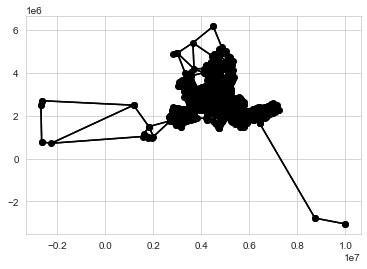

In [29]:
gabriel.plot(gdf=european_regions)

In [13]:
# construct the "Queen" adjacency graph. In geographical applications,
# the "Queen" adjacency graph considers two polygons as connected if
# they share a single point on their boundary. This is an analogue to
# the "Moore" neighborhood nine surrounding cells in a regular grid.
queen = weights.Queen.from_dataframe(european_regions)

C:\Users\joche\anaconda3\envs\abm\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 6 disconnected components.
  warnings.warn(message)


In [23]:
# Then, we can convert the graph to networkx object using the
# .to_networkx() method.
graph = gabriel.to_networkx()

In [24]:
# To plot with networkx, we need to merge the nodes back to
# their positions in order to plot in networkx
positions = dict(zip(graph.nodes, centroids))

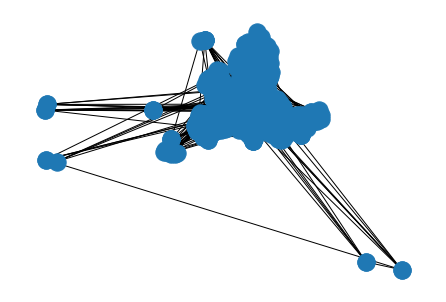

In [35]:
nx.draw(graph, positions)

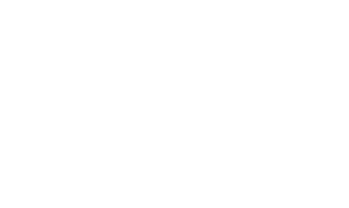

In [25]:
# plot with a nice basemap
ax = european_regions.plot(linewidth=1, edgecolor="grey", facecolor="lightblue")
ax.axis([-12, 45, 33, 66])
ax.axis("off")
nx.draw(graph, positions, ax=ax, node_size=5, node_color="r")
plt.show()

# An alternative method to construct graphs from polygons may use
# pygeos. This package is a high-performance interface to the GEOS C
# library, used in computing geographical relationships. These let us
# describe the relationships between "point sets," like polygons whether
# or not a line "crosses" a polygon, or whether two polygons "touch."
# These relationships, called "predicates", are extensive, and are documented
# by the pygeos package.